# Jupyter Notebook - Python for analyzing soilslips datasets 

This is a Jupyter Notebook, a web-based interactive development environment that allows to create and share python codes. First things first, what is **Python**? 
Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. Python's simple, easy to learn syntax emphasizes readability and therefore reduces the cost of program maintenance. Python supports modules and packages, which encourages program modularity and code reuse. The Python interpreter and the extensive standard library are available in source or binary form without charge for all major platforms, and can be freely distributed. The reference website is https://www.python.org/.

It can be used to write software in a wide variety of application domains, including data analysis and models developing. Python can be used to perform numerical calculations, statistical analyses or to access and plot data (even large datasets).
In Jupyter Notebook the *Python shell* is embedded. The shell is where you can write and execute a line (or multiple lines) of code. Python is open-source, and several packages are available covering many scientific and technological fields.

**NOTE**
* Python numbering starts from 0;
* Python uses whitespace indentation, rather than curly brackets or keywords, to delimit blocks. 

## Notebook Settings

In [1]:
# Add library (if needed)
!pip install numpy
!pip install pandas
!pip install rasterio
!pip install "matplotlib==3.1.3"

In [10]:
# Import libraries
import os
import json

import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio as rio

import matplotlib.pylab as plt

In [137]:
# Algorithm information
folder_name_db = "data/"
file_name_db = "Catasto_Frane_Luglio2020.shp"

folder_name_scenarios = "data/"
file_name_scenarios = "scenarios_from_201401010000_to_201912300000.csv"

folder_name_rain = "data/"
file_name_rain = "rain_201811060100.tiff"

folder_name_sm = "data/"
file_name_sm = "sm_alert_area_e_201912212300.tiff"

alert_area_name = "alert_area_c"

In [138]:
# Algorithm parameter(s)
time_format_datasets = '%Y-%m-%d'
time_format_graph = '%y-%m-%d'

In [139]:
# Dictionary to define seasons look-up table
seasons_lut = {
        1: 'DJF', 2: 'DJF', 3: 'MAM', 4: 'MAM', 5: 'MAM', 6: 'JJA',
        7: 'JJA', 8: 'JJA', 9: 'SON', 10: 'SON', 11: 'SON', 12: 'DJF'
}
month_lut = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
alert_area_lut = {
        1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}

In [140]:
# Define scenarios file path
file_path_db = os.path.join(folder_name_db, file_name_db)
file_path_scenarios = os.path.join(folder_name_scenarios, file_name_scenarios)
file_path_rain = os.path.join(folder_name_rain, file_name_rain)
file_path_sm = os.path.join(folder_name_sm, file_name_sm)

# Print file scenarios path
print(' --> file db path: ' + file_path_db)
print(' --> file scenerios path: ' + file_path_scenarios)
print(' --> file rain path: ' + file_path_rain)
print(' --> file sm path: ' + file_path_sm)

 --> file db path: data/Catasto_Frane_Luglio2020.shp
 --> file scenerios path: data/scenarios_from_201401010000_to_201912300000.csv
 --> file rain path: data/rain_201811060100.tiff
 --> file sm path: data/sm_alert_area_e_201912212300.tiff


## Notebook datasets

In [141]:
# Organize soilslips datasets
dframe_soilslips_shp = gpd.read_file(file_path_db)

# Add season reference
grp_season = [seasons_lut.get(pd.Timestamp(t_stamp).month) for t_stamp in dframe_soilslips_shp['DATA'].values]
dframe_soilslips_shp['event_season'] = grp_season
grp_month = [month_lut.get(pd.Timestamp(t_stamp).month) for t_stamp in dframe_soilslips_shp['DATA'].values]
dframe_soilslips_shp['event_month'] = grp_month

dframe_soilslips_shp['event_month'] = pd.Categorical(dframe_soilslips_shp['event_month'], categories=list(month_lut.values()), ordered=True)

# Print dataframe head
dframe_soilslips_shp.head(4)

,ID_FRANA,ZONA_ALLER,COMPRENSOR,PROVINCIA,COMUNE,INDIRIZZO,LAT,LON,DATA,GIORNO,...,NOTE,Sostanza,Causa,LITOTIPO,FOTO,layer,path,geometry,event_season,event_month
0,1.0,A,Comprensorio Imperiese,IMPERIA,AURIGO,via Piave da Loc. Rivolta a Rio Banco,43.98097,7.93360,2019-12-20,20.0,...,"viabilita' chiusa al transito, 2 persone evacuate",0,0,0,NaN,Monica_Catasto_Frane_TOTALE_pulito_2014_2019,Y:/area_elaborazioni/Catasto_Frane/Monica_Cata...,POINT (7.93360 43.98097),DJF,Dec
1,2.0,A,Comprensorio Albenganese,IMPERIA,BORGHETTO DI ARROSCIA,Fraz. Gavenola - Borgata Casale,44.07793,7.97094,2018-10-27,27.0,...,None,0,0,0,NaN,Monica_Catasto_Frane_TOTALE_pulito_2014_2019,Y:/area_elaborazioni/Catasto_Frane/Monica_Cata...,POINT (7.97094 44.07793),SON,Oct
2,3.0,A,Comprensorio Imperiese,IMPERIA,CHIUSANICO,Via Torria,43.98080,7.98037,2017-05-11,11.0,...,0,Altri (97),Frane e colate di fango (314),0,0.0,Monica_Catasto_Frane_TOTALE_pulito_2014_2019,Y:/area_elaborazioni/Catasto_Frane/Monica_Cata...,POINT (7.98037 43.98080),MAM,May
3,4.0,A,Comprensorio Imperiese,IMPERIA,CHIUSANICO,Torria,43.98143,7.98128,2017-05-15,15.0,...,0,Altri (97),Frane e colate di fango (314),0,0.0,Monica_Catasto_Frane_TOTALE_pulito_2014_2019,Y:/area_elaborazioni/Catasto_Frane/Monica_Cata...,POINT (7.98128 43.98143),MAM,May


In [142]:
dframe_soilslips_grp = dframe_soilslips_shp.groupby(by=["event_month"]).count()

dframe_soilslips_grp.head(12)

,ID_FRANA,ZONA_ALLER,COMPRENSOR,PROVINCIA,COMUNE,INDIRIZZO,LAT,LON,DATA,GIORNO,...,ID_FONTE,NOTE,Sostanza,Causa,LITOTIPO,FOTO,layer,path,geometry,event_season
event_month,,,,,,,,,,,,,,,,,,,,,
Jan,85,85,85,88,88,88,88,88,88,85,...,88,30,85,73,70,27,85,85,88,88
Feb,69,69,69,71,71,71,71,71,71,69,...,71,34,69,60,60,32,69,69,71,71
Mar,128,128,128,129,129,128,129,129,129,128,...,129,93,128,92,82,92,128,128,129,129
Apr,51,51,51,52,52,51,52,52,52,51,...,52,31,51,43,41,30,51,51,52,52
May,30,30,30,31,31,31,31,31,31,30,...,31,23,30,29,26,22,30,30,31,31
Jun,24,24,24,24,24,24,24,24,24,24,...,24,12,24,24,23,12,24,24,24,24
Jul,35,35,35,35,35,35,35,35,35,35,...,35,25,35,29,28,25,35,35,35,35
Aug,19,18,18,20,20,20,20,20,20,18,...,20,13,18,15,14,11,18,18,20,20
Sep,78,78,78,84,84,84,84,84,84,78,...,84,58,78,37,33,52,78,78,84,84


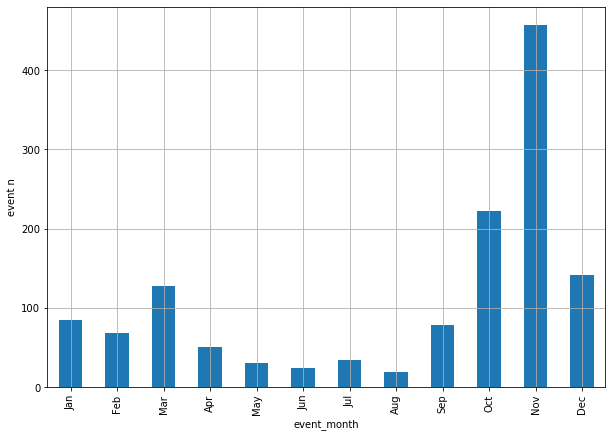

In [143]:
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
dframe_soilslips_grp['ID_FRANA'].plot.bar()
ax.set_ylabel('event n', color='#000000')
plt.grid()

In [144]:
dframe_soilslips_shp['event_area'] = pd.Categorical(dframe_soilslips_shp['ZONA_ALLER'], categories=list(alert_area_lut.values()), ordered=True)
dframe_soilslips_grp = dframe_soilslips_shp.groupby(by=["event_area"]).count()

dframe_soilslips_grp.head(12)

,ID_FRANA,ZONA_ALLER,COMPRENSOR,PROVINCIA,COMUNE,INDIRIZZO,LAT,LON,DATA,GIORNO,...,NOTE,Sostanza,Causa,LITOTIPO,FOTO,layer,path,geometry,event_season,event_month
event_area,,,,,,,,,,,,,,,,,,,,,
A,261,261,261,261,261,259,261,261,261,261,...,79,261,261,261,59,261,261,261,261,261
B,620,620,620,620,620,617,620,620,620,620,...,395,620,513,489,363,620,620,620,620,620
C,313,313,313,313,313,313,313,313,313,313,...,163,313,248,227,151,313,313,313,313,313
D,80,80,80,80,80,79,80,80,80,80,...,36,79,79,78,25,79,79,80,80,80
E,64,64,64,64,64,63,64,64,64,64,...,45,64,36,26,45,64,64,64,64,64


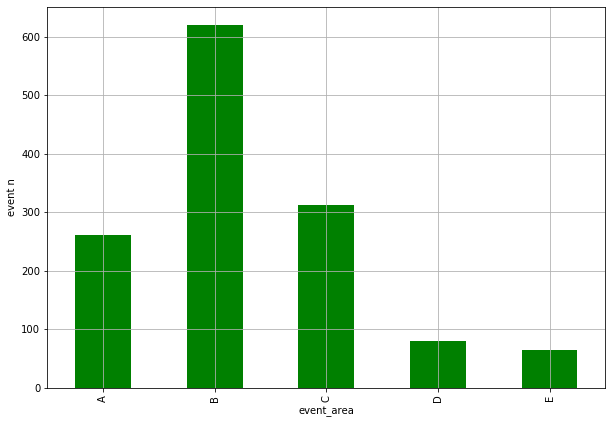

In [145]:
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(1, 1, 1)
dframe_soilslips_grp['ID_FRANA'].plot.bar(color='green')
ax.set_ylabel('event n')
plt.grid()

In [146]:
# Organize scenarios datasets
dframe_scenarios_csv = pd.read_csv(file_path_scenarios)
dframe_scenarios_csv = dframe_scenarios_csv.set_index('time')
dframe_scenarios_csv = dframe_scenarios_csv.iloc[::-1]

In [147]:
# Add season reference
grp_season = [seasons_lut.get(pd.Timestamp(t_stamp).month) for t_stamp in dframe_scenarios_csv.index.values]
dframe_scenarios_csv['event_season'] = grp_season
# Print dataframe head
dframe_scenarios_csv.head(20)

,sm_value_first,sm_value_last,sm_value_avg,sm_value_max,rain_accumulated_3H,rain_average_3H,rain_accumulated_6H,rain_average_6H,rain_accumulated_12H,rain_average_12H,...,rain_average_24H,rain_peak_3H,rain_peak_6H,rain_peak_12H,rain_peak_24H,event_n,event_threshold,event_index,event_domain,event_season
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,0.693,0.701,0.697,0.701,3.535,1.178,5.777,0.963,5.955,0.496,...,0.261,7.8,13.2,13.2,13.2,0,white,0,alert_area_e,DJF
2014-01-02,0.701,0.794,0.748,0.794,7.352,2.558,13.936,2.323,23.879,2.171,...,1.358,8.6,10.4,14.4,16.4,0,white,0,alert_area_e,DJF
2014-01-03,0.794,0.750,0.772,0.794,1.619,0.540,2.395,0.399,3.214,0.268,...,0.234,2.6,3.4,3.4,3.4,0,white,0,alert_area_e,DJF
2014-01-04,0.750,0.991,0.871,0.991,24.978,8.326,44.437,7.406,64.398,5.366,...,4.811,17.4,29.6,45.8,71.6,0,white,0,alert_area_e,DJF
2014-01-05,0.991,0.897,0.944,0.991,14.004,5.081,23.234,4.647,38.068,3.461,...,1.658,14.6,29.2,34.6,34.8,0,white,0,alert_area_e,DJF
2014-01-06,0.897,0.788,0.843,0.897,0.010,0.003,0.010,0.002,0.010,0.001,...,0.001,0.8,1.4,1.4,1.4,0,white,0,alert_area_e,DJF
2014-01-07,0.788,0.739,0.764,0.788,0.865,0.288,1.570,0.262,2.903,0.242,...,0.129,5.8,10.8,21.4,25.8,0,white,0,alert_area_e,DJF
2014-01-08,0.739,0.711,0.725,0.739,1.867,0.622,2.665,0.533,4.233,0.385,...,0.201,5.4,8.4,12.0,14.0,1,green,1,alert_area_e,DJF
2014-01-09,0.711,0.680,0.695,0.711,0.053,0.026,0.105,0.021,0.105,0.010,...,0.005,0.4,0.4,0.6,0.6,0,white,0,alert_area_e,DJF


In [148]:
# Read file tiff (rain)
file_handle_rain = rio.open(file_path_rain)
file_proj_rain = file_handle_rain.crs.wkt
file_geotrans_rain = file_handle_rain.transform
file_bounds_rain = file_handle_rain.bounds
file_res_rain = (abs(file_geotrans_rain.a), abs(file_geotrans_rain.e)) 

file_tags_rain = file_handle_rain.tags()
file_bands_rain = file_handle_rain.count
file_metadata_rain = file_handle_rain.profile

file_data_rain = file_handle_rain.read(1)

print(' --> file rain georeference: \n' + str(file_metadata_rain))
print(' --> file rain bounds: \n' + str(file_bounds_rain))

 --> file rain georeference: 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2576, 'height': 901, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(0.0009996118012425698, 0.0, 7.495329062351291,
       0.0, -0.0009988901220842426, 44.67618471359482), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}
 --> file rain bounds: 
BoundingBox(left=7.495329062351291, bottom=43.77618471359692, right=10.070329062352151, top=44.67618471359482)


In [149]:
# Compute geographic reference
center_right = file_bounds_rain.right - (file_res_rain[0] / 2)
center_left = file_bounds_rain.left + (file_res_rain[0] / 2)
center_top = file_bounds_rain.top - (file_res_rain[1] / 2)
center_bottom = file_bounds_rain.bottom + (file_res_rain[1] / 2)

lon = np.arange(center_left, center_right + np.abs(file_res_rain[0] / 2), np.abs(file_res_rain[0]), float)
lat = np.flip(np.arange(center_bottom, center_top + np.abs(file_res_rain[0] / 2), np.abs(file_res_rain[1]), float), axis=0)
lons, lats = np.meshgrid(lon, lat)

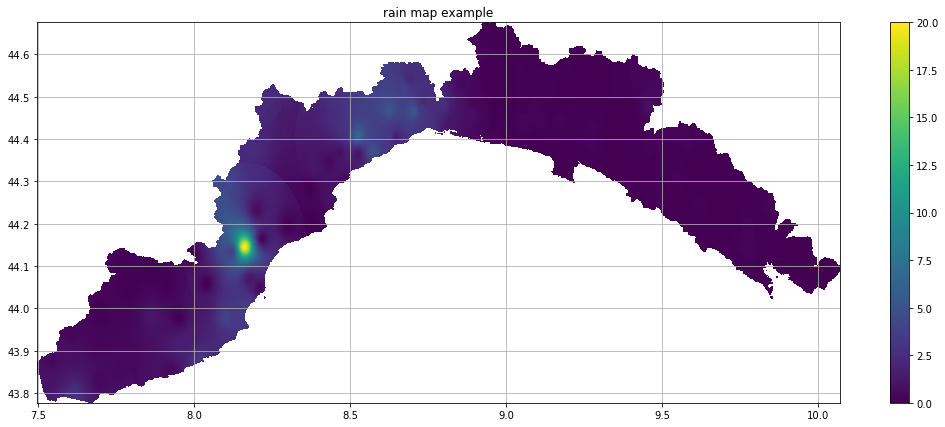

In [150]:
# Plot rain map
plt.figure(figsize=(18, 7))
plt.pcolor(lons, lats, file_data_rain)
plt.colorbar()
plt.clim(0, 20)
plt.grid()
plt.title('rain map example')
plt.show()

In [151]:
# Read file tiff (sm)
file_handle_sm = rio.open(file_path_sm)
# file_proj_sm = file_handle_sm.crs.wkt
file_geotrans_sm = file_handle_sm.transform
file_bounds_sm = file_handle_sm.bounds
file_res_sm = (abs(file_geotrans_sm.a), abs(file_geotrans_sm.e)) 

file_tags_sm = file_handle_sm.tags()
file_bands_sm = file_handle_sm.count
file_metadata_sm = file_handle_sm.profile

file_data_sm = file_handle_sm.read(1)

print(' --> file sm georeference: \n' + str(file_metadata_sm))
print(' --> file sm bounds: \n' + str(file_bounds_sm))

 --> file sm georeference: 
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 627, 'height': 240, 'count': 1, 'crs': None, 'transform': Affine(0.0009984051036677083, 0.0, 8.877536741872355,
       0.0, -0.0009958333333310125, 44.67560483004505), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}
 --> file sm bounds: 
BoundingBox(left=8.877536741872355, bottom=44.43660483004561, right=9.503536741872008, top=44.67560483004505)


In [152]:
# Compute geographic reference
center_right = file_bounds_sm.right - (file_res_rain[0] / 2)
center_left = file_bounds_sm.left + (file_res_rain[0] / 2)
center_top = file_bounds_sm.top - (file_res_rain[1] / 2)
center_bottom = file_bounds_sm.bottom + (file_res_rain[1] / 2)

lon = np.arange(center_left, center_right + np.abs(file_res_sm[0] / 2), np.abs(file_res_sm[0]), float)
lat = np.flip(np.arange(center_bottom, center_top + np.abs(file_res_sm[0] / 2), np.abs(file_res_sm[1]), float), axis=0)
lons, lats = np.meshgrid(lon, lat)


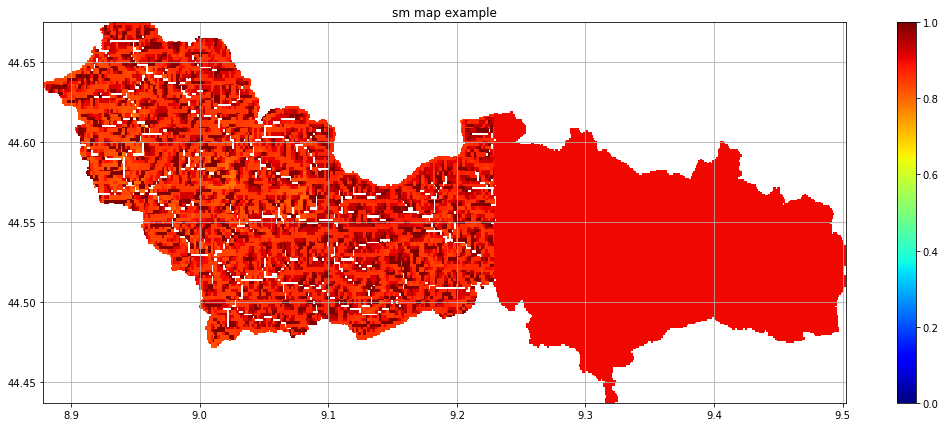

In [153]:
# Plot sm map
plt.figure(figsize=(18, 7))
plt.pcolor(lons, lats, file_data_sm, cmap='jet')
plt.colorbar()
plt.clim(0, 1)
plt.grid()
plt.title('sm map example')
plt.show()

## Exercize 1 - Rain and SoilMoisture 

In [28]:
dframe_scenarios_1 = dframe_scenarios_csv.copy()

In [29]:
# View dframe scenarios
dframe_scenarios_1.head(5)

,sm_value_first,sm_value_last,sm_value_avg,sm_value_max,rain_accumulated_3H,rain_average_3H,rain_accumulated_6H,rain_average_6H,rain_accumulated_12H,rain_average_12H,...,rain_average_24H,rain_peak_3H,rain_peak_6H,rain_peak_12H,rain_peak_24H,event_n,event_threshold,event_index,event_domain,event_season
time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,0.693,0.701,0.697,0.701,3.535,1.178,5.777,0.963,5.955,0.496,...,0.261,7.8,13.2,13.2,13.2,0,white,0,alert_area_e,DJF
2014-01-02,0.701,0.794,0.748,0.794,7.352,2.558,13.936,2.323,23.879,2.171,...,1.358,8.6,10.4,14.4,16.4,0,white,0,alert_area_e,DJF
2014-01-03,0.794,0.750,0.772,0.794,1.619,0.540,2.395,0.399,3.214,0.268,...,0.234,2.6,3.4,3.4,3.4,0,white,0,alert_area_e,DJF
2014-01-04,0.750,0.991,0.871,0.991,24.978,8.326,44.437,7.406,64.398,5.366,...,4.811,17.4,29.6,45.8,71.6,0,white,0,alert_area_e,DJF
2014-01-05,0.991,0.897,0.944,0.991,14.004,5.081,23.234,4.647,38.068,3.461,...,1.658,14.6,29.2,34.6,34.8,0,white,0,alert_area_e,DJF


In [30]:
# Exercize settings
time_start = '2018-10-01' # '2018-01-01', None
time_end = '2019-01-01' # '2019-01-01', None
alert_area_name = 'alert_area_c' # 'alert_area_c'

In [31]:
# Select alert area datasets
if alert_area_name is not None:
    dframe_scenarios_1 = dframe_scenarios_1.loc[dframe_scenarios_1['event_domain'] == alert_area_name]

# Select time period datasets
if (time_start is not None) and (time_end is not None):
    time_stamp_start = pd.Timestamp(time_start)
    time_stamp_end = pd.Timestamp(time_end)
    dframe_scenarios_1 = dframe_scenarios_1[time_stamp_start.strftime(time_format_datasets):
                                        time_stamp_end.strftime(time_format_datasets)]

In [32]:
# Get series datasets
series_sm_first = dframe_scenarios_1['sm_value_first']
series_sm_last = dframe_scenarios_1['sm_value_last']
series_rain_acc_3H = dframe_scenarios_1['rain_accumulated_3H']
series_rain_acc_6H = dframe_scenarios_1['rain_accumulated_6H']

In [33]:
# Get time
tick_time_period = list(dframe_scenarios_1.index.values)
tick_time_idx = range(0, tick_time_period.__len__())
tick_time_labels = [pd.Timestamp(tick_label).strftime(time_format_datasets) for tick_label in tick_time_period]

tick_time_start = pd.Timestamp(tick_time_period[0]).strftime(time_format_datasets)
tick_time_end = pd.Timestamp(tick_time_period[-1]).strftime(time_format_datasets)

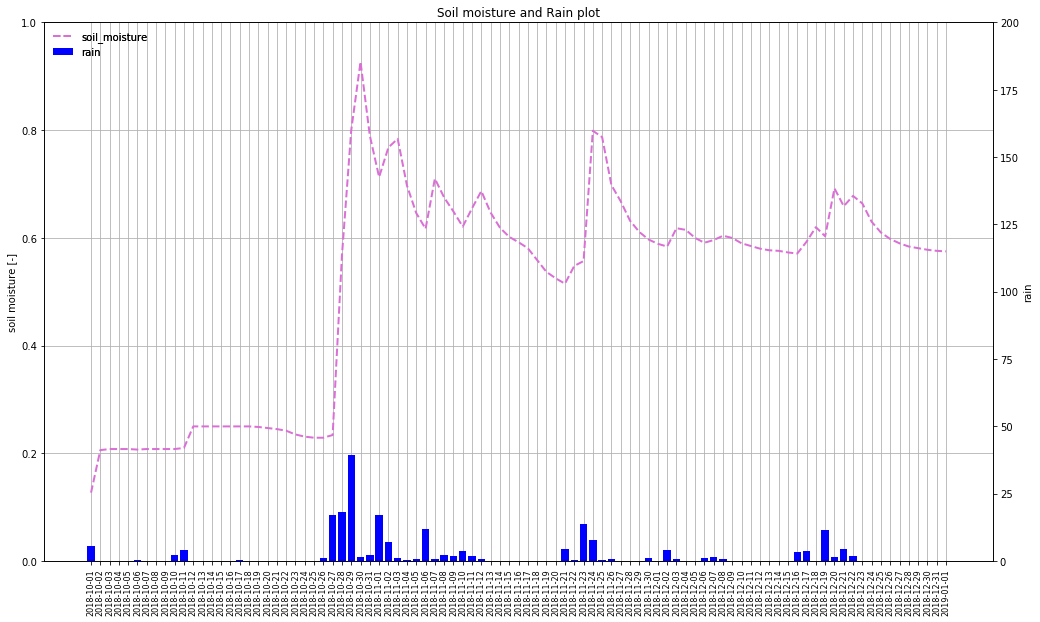

In [34]:
# Plot soil moisture vs rain time-series
fig = plt.figure(figsize=(17, 11))
fig.autofmt_xdate()

ax1 = plt.subplot(1, 1, 1)
ax1.set_xticks(tick_time_idx)
ax1.set_xticklabels(tick_time_labels, rotation=90, fontsize=8)
#ax1.set_xlim(tick_time_start, tick_time_end)
ax1.grid(b=True)

p1 = ax1.plot(series_sm_first.index, series_sm_first.values, color='#DA70D6', linestyle='--', lw=2)

ax1.set_ylabel('soil moisture [-]', color='#000000')
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()

ax2.set_ylabel('rain', color='#000000')
ax2.set_ylim(0, 200)

ax2.set_xticks(tick_time_idx)
# ax2.set_xticklabels([])
# ax2.set_xlim(tick_time_start, tick_time_end)

p2 = ax2.bar(series_rain_acc_3H.index, series_rain_acc_3H.values, color='blue', lw=2)

legend = ax1.legend((p1[0], p2[0]),
                    ('soil_moisture', 'rain',),
                    frameon=False, loc=2)
ax1.add_artist(legend)
ax1.set_title('Soil moisture and Rain plot')

plt.show()

## Exercize 2 - Event Index, Accumulated Rain and Peak Rain  

In [35]:
dframe_scenarios_2 = dframe_scenarios_csv.copy()

In [36]:
# Exercize settings
time_start = '2018-10-01' # '2018-01-01', None
time_end = '2019-01-01' # '2019-01-01', None
alert_area_name = 'alert_area_c' # 'alert_area_c'

rain_event_threshold = 2 # [mm]

In [37]:
# Select alert area datasets
if alert_area_name is not None:
    dframe_scenarios_2 = dframe_scenarios_2.loc[dframe_scenarios_2['event_domain'] == alert_area_name]

# Select time period datasets
if (time_start is not None) and (time_end is not None):
    time_stamp_start = pd.Timestamp(time_start)
    time_stamp_end = pd.Timestamp(time_end)
    dframe_scenarios_2 = dframe_scenarios_2[time_stamp_start.strftime(time_format_datasets):
                                        time_stamp_end.strftime(time_format_datasets)]

In [38]:
# Get time
tick_time_period = list(dframe_scenarios_2.index.values)
tick_time_idx = range(0, tick_time_period.__len__())
tick_time_labels = [pd.Timestamp(tick_label).strftime(time_format_datasets) for tick_label in tick_time_period]

In [39]:
# Compute accumulated rain for each event
dframe_scenarios_2['rain_reset_step'] = 1
dframe_scenarios_2['rain_reset_step'] = dframe_scenarios_2['rain_reset_step'].where(dframe_scenarios_2['rain_accumulated_6H'] < rain_event_threshold, 0)
dframe_scenarios_2['rain_reset_cumsum'] = dframe_scenarios_2['rain_reset_step'].cumsum()

dframe_scenarios_2['rain_cumsum_6H'] = dframe_scenarios_2.groupby(['rain_reset_cumsum'])['rain_accumulated_6H'].cumsum()
dframe_scenarios_2['event_index_cumsum'] = dframe_scenarios_2.groupby(['rain_reset_cumsum'])['event_index'].cumsum()

In [40]:
# View dframe scenarios
dframe_scenarios_2.head(25)

,sm_value_first,sm_value_last,sm_value_avg,sm_value_max,rain_accumulated_3H,rain_average_3H,rain_accumulated_6H,rain_average_6H,rain_accumulated_12H,rain_average_12H,...,rain_peak_24H,event_n,event_threshold,event_index,event_domain,event_season,rain_reset_step,rain_reset_cumsum,rain_cumsum_6H,event_index_cumsum
time,,,,,,,,,,,,,,,,,,,,,
2018-10-01,0.127,0.206,0.166,0.206,5.517,1.839,5.930,0.988,6.382,0.532,...,30.6,0,white,0,alert_area_c,SON,0,0,5.930,0
2018-10-02,0.206,0.208,0.207,0.208,0.143,0.072,0.145,0.029,0.148,0.013,...,2.4,0,white,0,alert_area_c,SON,1,1,0.145,0
2018-10-03,0.208,0.208,0.208,0.208,0.006,0.002,0.006,0.001,0.006,0.001,...,0.2,0,white,0,alert_area_c,SON,1,2,0.006,0
2018-10-04,0.208,0.208,0.208,0.208,0.006,0.002,0.006,0.001,0.011,0.001,...,0.0,0,white,0,alert_area_c,SON,1,3,0.006,0
2018-10-05,0.208,0.207,0.207,0.208,0.007,0.002,0.012,0.002,0.019,0.002,...,0.2,0,white,0,alert_area_c,SON,1,4,0.012,0
2018-10-06,0.207,0.208,0.207,0.208,0.343,0.114,0.403,0.067,0.403,0.037,...,2.2,0,white,0,alert_area_c,SON,1,5,0.403,0
2018-10-07,0.208,0.208,0.208,0.208,0.044,0.015,0.050,0.008,0.055,0.005,...,3.8,0,white,0,alert_area_c,SON,1,6,0.050,0
2018-10-08,0.208,0.208,0.208,0.208,0.021,0.007,0.021,0.003,0.029,0.003,...,1.0,0,white,0,alert_area_c,SON,1,7,0.021,0
2018-10-09,0.208,0.208,0.208,0.208,0.013,0.004,0.013,0.002,0.013,0.001,...,0.2,0,white,0,alert_area_c,SON,1,8,0.013,0


In [41]:
# Get series datasets
series_rain_peak_3H = dframe_scenarios_2['rain_peak_3H']
series_rain_accum_6H = dframe_scenarios_2['rain_accumulated_6H']
series_event_index = dframe_scenarios_2['event_index']
series_rain_cumsum_6H = dframe_scenarios_2['rain_cumsum_6H']
series_cumsum_index = dframe_scenarios_2['event_index_cumsum']

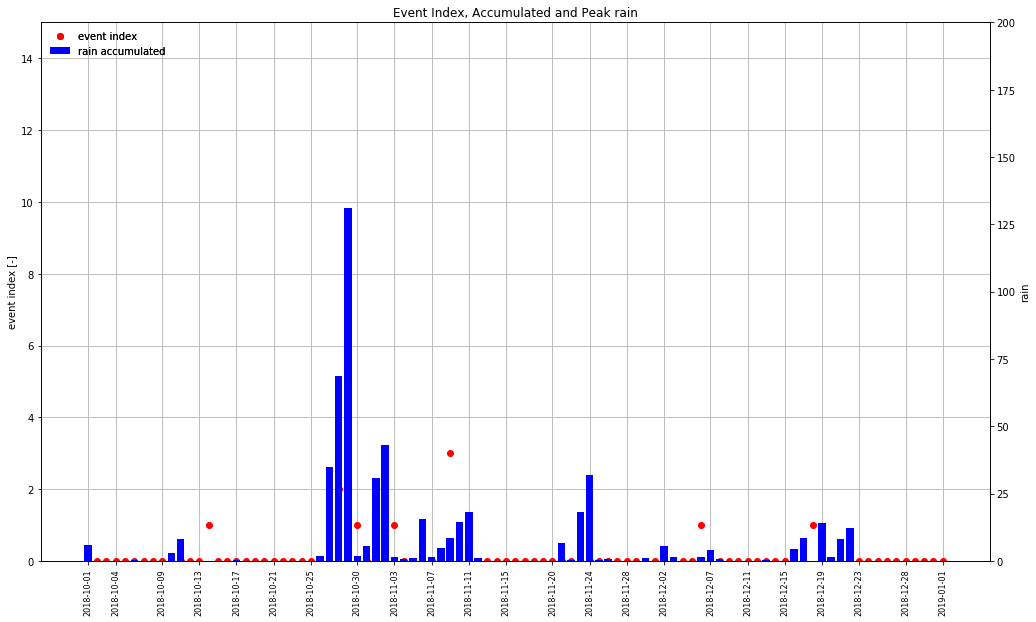

In [42]:
# Plot event index, accumulated and peak rain
fig = plt.figure(figsize=(17, 11))
fig.autofmt_xdate()

ax1 = plt.subplot(1, 1, 1)
ax1.set_xticks(tick_time_idx)
ax1.set_xticklabels(tick_time_labels, rotation=90, fontsize=8)
# ax1.set_xlim(tick_time_start, tick_time_end)
ax1.grid(b=True)

p1 = ax1.plot(series_event_index.index, series_event_index.values,
              'o', color='red', lw=2)

ax1.set_ylabel('event index [-]', color='#000000')
ax1.set_ylim(0, 15)

ax2 = ax1.twinx()

ax2.set_ylabel('rain', color='#000000')
ax2.set_ylim(0, 200)

ax2.set_xticks(tick_time_idx)

x_n = 25
x_min, x_max = ax2.get_xlim()
x_tmp = np.linspace(x_min, x_max, x_n, dtype=int)

x_labels = []
x_ticks = []
for x_step in x_tmp:
    if (x_step >= 0) and (x_step <= tick_time_labels.__len__()):
        x_label = tick_time_labels[x_step]
        x_ticks.append(x_step)
        x_labels.append(x_label)

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_labels)

# ax2.set_xticklabels([])
# ax2.set_xlim(tick_time_start, tick_time_end)

p2 = ax2.bar(series_rain_cumsum_6H.index, series_rain_cumsum_6H.values,
              color='blue', lw=2, linestyle='--')
# p3 = ax2.plot(series_rain_peak_3H.index, series_rain_peak_3H.values, 'o', color='red', lw=2)

legend = ax1.legend((p1[0], p2[0]),
                    ('event index', 'rain accumulated', 'rain peak',),
                    frameon=False, loc=2)
ax1.add_artist(legend)
ax1.set_title('Event Index, Accumulated and Peak rain')

plt.show()

## Exercize 3 - Event Index, Accumulated Rain and Peak Rain  

In [43]:
dframe_scenarios_3 = dframe_scenarios_csv.copy()

In [44]:
# Exercize settings
time_start = None # '2018-01-01'
time_end = None # '2019-01-01'

alert_area_name = None # 'alert_area_c'

season_label = 'ALL' # 'ALL', 'SON', 'DJF', 'MAM', 'JJA'

var_x_limits = [0, 1]
var_y_limits = [0, 100]
var_z_limits = [0, 4]

event_label = True
event_label_min = 2
event_index_min = 2

In [45]:
# Select alert area datasets
if alert_area_name is not None:
    dframe_scenarios_3 = dframe_scenarios_3.loc[dframe_scenarios_3['event_domain'] == alert_area_name]

# Select time period datasets
if (time_start is not None) and (time_end is not None):
    time_stamp_start = pd.Timestamp(time_start)
    time_stamp_end = pd.Timestamp(time_end)
    dframe_scenarios_3 = dframe_scenarios_3[time_stamp_start.strftime(time_format_datasets):
                                            time_stamp_end.strftime(time_format_datasets)]

In [46]:
# Filter datasets according with the event index threshold
dframe_scenarios_3.loc[dframe_scenarios_3['event_index'] < event_index_min] = np.nan
dframe_scenarios_3 = dframe_scenarios_3.dropna(how='all')
dframe_scenarios_3.head(10)

,sm_value_first,sm_value_last,sm_value_avg,sm_value_max,rain_accumulated_3H,rain_average_3H,rain_accumulated_6H,rain_average_6H,rain_accumulated_12H,rain_average_12H,...,rain_average_24H,rain_peak_3H,rain_peak_6H,rain_peak_12H,rain_peak_24H,event_n,event_threshold,event_index,event_domain,event_season
time,,,,,,,,,,,,,,,,,,,,,
2015-09-13,0.321,0.799,0.560,0.799,65.536,21.845,71.529,11.922,73.572,6.131,...,5.020,114.4,118.0,118.0,126.2,4.0,yellow,2.0,alert_area_e,SON
2015-09-14,0.799,0.831,0.815,0.831,32.806,16.403,50.021,10.004,50.055,4.550,...,2.199,18.0,18.0,18.2,18.2,23.0,red,4.0,alert_area_e,SON
2017-12-11,0.671,0.990,0.831,0.990,39.960,13.320,77.817,12.970,126.458,10.538,...,8.098,109.6,110.6,153.0,158.0,3.0,yellow,2.0,alert_area_e,DJF
2017-12-12,0.990,0.839,0.915,0.990,0.697,0.348,0.712,0.142,0.783,0.071,...,0.043,9.2,17.2,25.6,26.4,4.0,yellow,2.0,alert_area_e,DJF
2018-03-15,0.718,0.921,0.820,0.921,25.992,8.664,43.527,7.255,58.579,4.882,...,2.754,42.8,54.8,59.2,114.8,3.0,yellow,2.0,alert_area_e,MAM
2018-10-29,0.956,0.993,0.974,0.993,32.442,10.814,43.810,7.302,68.053,5.671,...,4.372,63.2,101.4,137.0,220.6,3.0,yellow,2.0,alert_area_e,SON
2014-10-10,0.462,0.531,0.497,0.531,18.250,6.083,25.585,4.264,27.493,2.291,...,1.205,47.2,49.4,50.6,50.6,6.0,orange,3.0,alert_area_d,SON
2014-10-13,0.519,0.665,0.592,0.665,14.112,4.704,25.043,4.174,31.624,2.875,...,1.654,22.2,35.6,35.8,38.4,3.0,yellow,2.0,alert_area_d,SON
2014-11-15,0.713,0.948,0.830,0.948,48.103,16.034,82.453,13.742,141.936,12.903,...,7.982,59.4,82.6,96.6,175.6,3.0,yellow,2.0,alert_area_d,SON


In [47]:
# Filter datasets according with the season name
if season_label != 'ALL':
    dframe_scenarios_3 = dframe_scenarios_3.loc[dframe_scenarios_3['event_season'] == season_label]
dframe_scenarios_3.head(23)

,sm_value_first,sm_value_last,sm_value_avg,sm_value_max,rain_accumulated_3H,rain_average_3H,rain_accumulated_6H,rain_average_6H,rain_accumulated_12H,rain_average_12H,...,rain_average_24H,rain_peak_3H,rain_peak_6H,rain_peak_12H,rain_peak_24H,event_n,event_threshold,event_index,event_domain,event_season
time,,,,,,,,,,,,,,,,,,,,,
2015-09-13,0.321,0.799,0.560,0.799,65.536,21.845,71.529,11.922,73.572,6.131,...,5.020,114.4,118.0,118.0,126.2,4.0,yellow,2.0,alert_area_e,SON
2015-09-14,0.799,0.831,0.815,0.831,32.806,16.403,50.021,10.004,50.055,4.550,...,2.199,18.0,18.0,18.2,18.2,23.0,red,4.0,alert_area_e,SON
2017-12-11,0.671,0.990,0.831,0.990,39.960,13.320,77.817,12.970,126.458,10.538,...,8.098,109.6,110.6,153.0,158.0,3.0,yellow,2.0,alert_area_e,DJF
2017-12-12,0.990,0.839,0.915,0.990,0.697,0.348,0.712,0.142,0.783,0.071,...,0.043,9.2,17.2,25.6,26.4,4.0,yellow,2.0,alert_area_e,DJF
2018-03-15,0.718,0.921,0.820,0.921,25.992,8.664,43.527,7.255,58.579,4.882,...,2.754,42.8,54.8,59.2,114.8,3.0,yellow,2.0,alert_area_e,MAM
2018-10-29,0.956,0.993,0.974,0.993,32.442,10.814,43.810,7.302,68.053,5.671,...,4.372,63.2,101.4,137.0,220.6,3.0,yellow,2.0,alert_area_e,SON
2014-10-10,0.462,0.531,0.497,0.531,18.250,6.083,25.585,4.264,27.493,2.291,...,1.205,47.2,49.4,50.6,50.6,6.0,orange,3.0,alert_area_d,SON
2014-10-13,0.519,0.665,0.592,0.665,14.112,4.704,25.043,4.174,31.624,2.875,...,1.654,22.2,35.6,35.8,38.4,3.0,yellow,2.0,alert_area_d,SON
2014-11-15,0.713,0.948,0.830,0.948,48.103,16.034,82.453,13.742,141.936,12.903,...,7.982,59.4,82.6,96.6,175.6,3.0,yellow,2.0,alert_area_d,SON


In [48]:
# Get datasets
var_time = dframe_scenarios_3.index.values.tolist()
var_data_x = dframe_scenarios_3['sm_value_first'].values
var_data_y = dframe_scenarios_3['rain_accumulated_6H'].values
var_data_z = dframe_scenarios_3['event_index'].values

In [49]:
# Compute ancillary values
var_p95_x = np.percentile(var_data_x, 95)
var_p99_x = np.percentile(var_data_x, 99)

var_p95_str = '{0:.2f}'.format(var_p95_x)
var_p99_str = '{0:.2f}'.format(var_p99_x)

var_time_from_str = pd.Timestamp(var_time[0]).strftime('%Y-%m-%d')
var_time_to_str = pd.Timestamp(var_time[-1]).strftime('%Y-%m-%d')

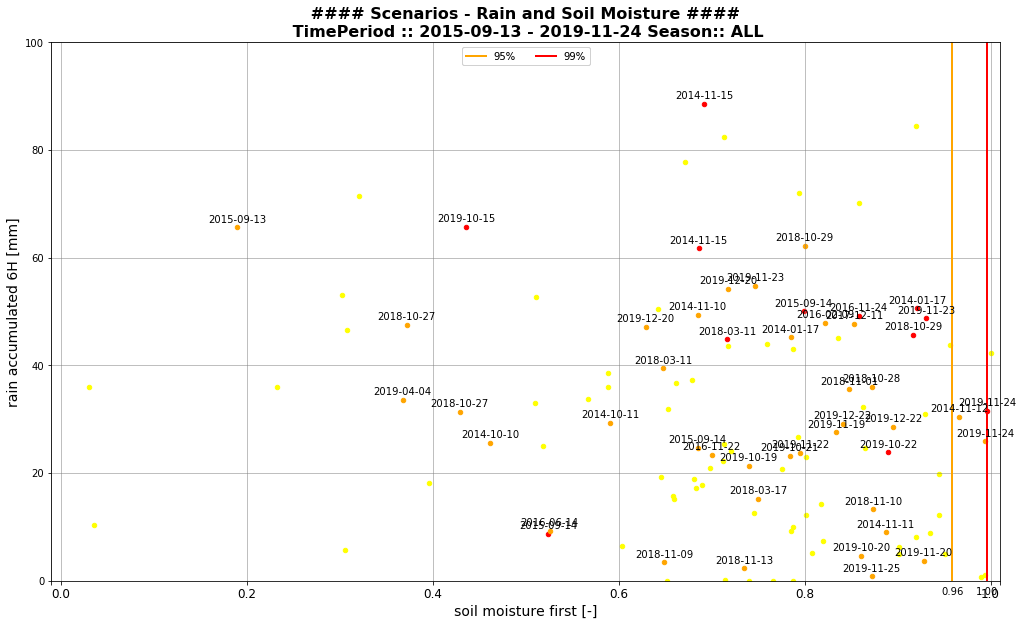

In [50]:
# Plot rain and soilmoisture event (1)
fig = plt.figure(figsize=(17, 11))
fig.autofmt_xdate()

axes = plt.axes()
axes.autoscale(True)

p95 = axes.axvline(var_p95_x, color='#FFA500', linestyle='-', lw=2, label='95%')
plt.text(var_p95_x, -0.02, var_p95_str, transform=axes.get_xaxis_transform(), ha='center', va='center')
p99 = axes.axvline(var_p99_x, color='#FF0000', linestyle='-', lw=2, label='99%')
plt.text(var_p99_x, -0.02, var_p99_str, transform=axes.get_xaxis_transform(), ha='center', va='center')

colors = {0: 'grey', 1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}
for t, x, y, z in zip(var_time, var_data_x, var_data_y, var_data_z):

    if z >= event_index_min:
        t = pd.Timestamp(t)

        if y >= 0:
            color = colors[z]
            p1 = axes.scatter(x, y, alpha=1, color=color, s=20)

            if event_label:
                if z > event_label_min:
                    label = t.strftime('%Y-%m-%d')
                    plt.annotate(label,  # this is the text
                                 (x, y),  # this is the point to label
                                 textcoords="offset points",  # how to position the text
                                 xytext=(0, 5),  # distance from text to points (x,y)
                                 ha='center')  # horizontal alignment can be left, right or center
        else:
            print(' ===> Value of y is negative (' + str(y) + ') at time ' + str(t))

axes.set_xlabel('soil moisture first [-]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
axes.set_xlim(var_x_limits[0], var_x_limits[1])
axes.set_ylabel('rain accumulated 6H [mm]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
#if var_y_limits is not None:
#    axes.set_ylim(var_y_limits[0], var_y_limits[1])

xticks_list = axes.get_xticks().tolist()
xticks_list.insert(0, -0.01)
xticks_list.insert(len(xticks_list), 1.01)
axes.set_xticks(xticks_list)
axes.set_xticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', ''], fontsize=12)

axes.set_ylim(0, 100)
#axes.set_yscale('log')

legend = axes.legend((p95, p99), ('95%', '99%'), frameon=True, ncol=3, loc=9)
axes.add_artist(legend)

axes.grid(b=False, color='grey', linestyle='-', linewidth=0.5, alpha=1)

axes.set_title(' #### Scenarios - Rain and Soil Moisture #### \n ' +
               'TimePeriod :: ' + var_time_from_str + ' - ' + var_time_to_str + ' Season:: ' + season_label,
               fontdict=dict(fontsize=16, fontweight='bold'))
plt.show()

In [51]:
line_point_x = np.linspace(0, 1, 100)

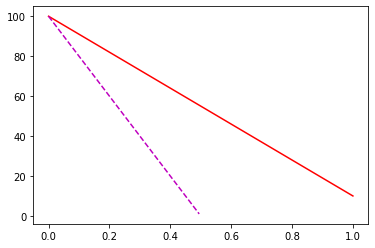

In [52]:
# Plot lines to divide event area
plt.figure()

line_point_y = -90 * line_point_x + 100
line_point_y[line_point_y < 0] = np.nan
line_index_nan = np.argwhere(np.isnan(line_point_y))
line_index_nan = line_index_nan.flatten().tolist()
plt.plot(line_point_x, line_point_y, '-r', label='')

line_point_y = -125 * line_point_x + 75
line_point_y[line_point_y < 0] = np.nan
#plt.plot(line_point_x, line_point_y, '-.g', label='')

line_point_y = -150 * line_point_x + 150
line_point_y[line_point_y < 0] = np.nan
#plt.plot(line_point_x, line_point_y, ':b', label='')

line_point_y = -200 * line_point_x + 100
line_point_y[line_point_y < 0] = np.nan
plt.plot(line_point_x, line_point_y, '--m', label='')

plt.show()

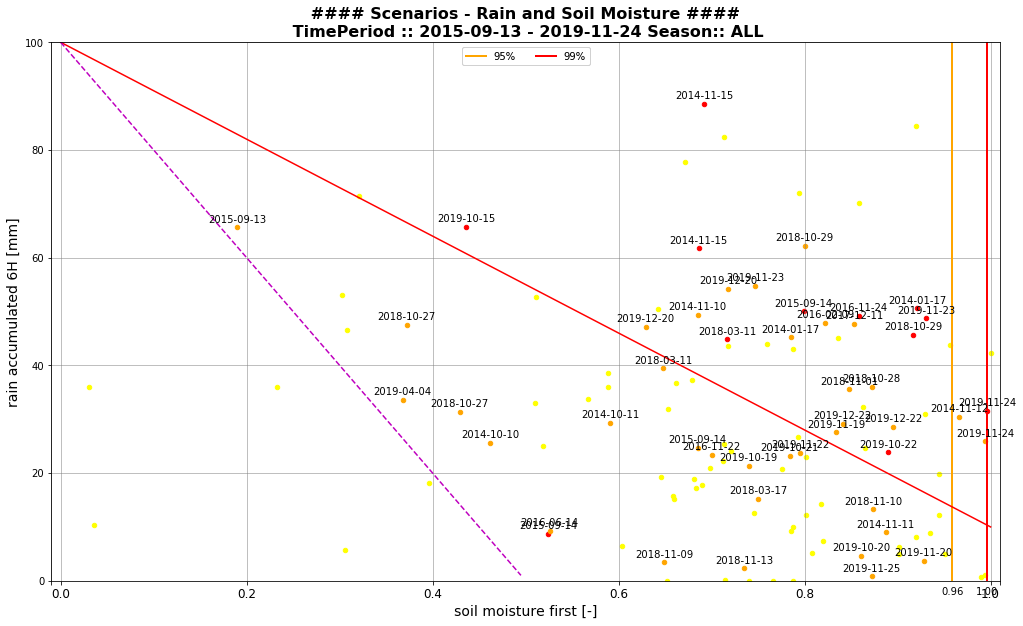

In [53]:
# Plot rain and soilmoisture event (2)
fig = plt.figure(figsize=(17, 11))
fig.autofmt_xdate()

axes = plt.axes()
axes.autoscale(True)

p95 = axes.axvline(var_p95_x, color='#FFA500', linestyle='-', lw=2, label='95%')
plt.text(var_p95_x, -0.02, var_p95_str, transform=axes.get_xaxis_transform(), ha='center', va='center')
p99 = axes.axvline(var_p99_x, color='#FF0000', linestyle='-', lw=2, label='99%')
plt.text(var_p99_x, -0.02, var_p99_str, transform=axes.get_xaxis_transform(), ha='center', va='center')

colors = {0: 'grey', 1: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}
for t, x, y, z in zip(var_time, var_data_x, var_data_y, var_data_z):

    if z >= event_index_min:
        t = pd.Timestamp(t)

        if y >= 0:
            color = colors[z]
            p1 = axes.scatter(x, y, alpha=1, color=color, s=20)

            if event_label:
                if z > event_label_min:
                    label = t.strftime('%Y-%m-%d')
                    plt.annotate(label,  # this is the text
                                 (x, y),  # this is the point to label
                                 textcoords="offset points",  # how to position the text
                                 xytext=(0, 5),  # distance from text to points (x,y)
                                 ha='center')  # horizontal alignment can be left, right or center
        else:
            print(' ===> Value of y is negative (' + str(y) + ') at time ' + str(t))

            
line_point_y = -90 * line_point_x + 100
line_point_y[line_point_y < 0] = np.nan
line_index_nan = np.argwhere(np.isnan(line_point_y))
line_index_nan = line_index_nan.flatten().tolist()
plt.plot(line_point_x, line_point_y, '-r', label='')

line_point_y = -125 * line_point_x + 75
line_point_y[line_point_y < 0] = np.nan
#plt.plot(line_point_x, line_point_y, '-.g', label='')

line_point_y = -150 * line_point_x + 150
line_point_y[line_point_y < 0] = np.nan
#plt.plot(line_point_x, line_point_y, ':b', label='')

line_point_y = -200 * line_point_x + 100
line_point_y[line_point_y < 0] = np.nan
plt.plot(line_point_x, line_point_y, '--m', label='')

axes.set_xlabel('soil moisture first [-]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
axes.set_xlim(var_x_limits[0], var_x_limits[1])
axes.set_ylabel('rain accumulated 6H [mm]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
#if var_y_limits is not None:
#    axes.set_ylim(var_y_limits[0], var_y_limits[1])

xticks_list = axes.get_xticks().tolist()
xticks_list.insert(0, -0.01)
xticks_list.insert(len(xticks_list), 1.01)
axes.set_xticks(xticks_list)
axes.set_xticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', ''], fontsize=12)

axes.set_ylim(0, 100)
#axes.set_yscale('log')

legend = axes.legend((p95, p99), ('95%', '99%'), frameon=True, ncol=3, loc=9)
axes.add_artist(legend)

axes.grid(b=False, color='grey', linestyle='-', linewidth=0.5, alpha=1)

axes.set_title(' #### Scenarios - Rain and Soil Moisture #### \n ' +
               'TimePeriod :: ' + var_time_from_str + ' - ' + var_time_to_str + ' Season:: ' + season_label,
               fontdict=dict(fontsize=16, fontweight='bold'))
plt.show()

## Exercize 4 - Rain and SoilMoisture histograms

In [54]:
dframe_scenarios_4 = dframe_scenarios_csv.copy()

In [55]:
# Exercize settings
event_index_min = 3

In [56]:
# Filter datasets according with the event index threshold
dframe_scenarios_4.loc[dframe_scenarios_4['event_index'] < event_index_min] = np.nan
dframe_scenarios_4 = dframe_scenarios_4.dropna(how='all')
dframe_scenarios_4.head(10)

,sm_value_first,sm_value_last,sm_value_avg,sm_value_max,rain_accumulated_3H,rain_average_3H,rain_accumulated_6H,rain_average_6H,rain_accumulated_12H,rain_average_12H,...,rain_average_24H,rain_peak_3H,rain_peak_6H,rain_peak_12H,rain_peak_24H,event_n,event_threshold,event_index,event_domain,event_season
time,,,,,,,,,,,,,,,,,,,,,
2015-09-14,0.799,0.831,0.815,0.831,32.806,16.403,50.021,10.004,50.055,4.550,...,2.199,18.0,18.0,18.2,18.2,23.0,red,4.0,alert_area_e,SON
2014-10-10,0.462,0.531,0.497,0.531,18.250,6.083,25.585,4.264,27.493,2.291,...,1.205,47.2,49.4,50.6,50.6,6.0,orange,3.0,alert_area_d,SON
2019-10-22,0.890,0.804,0.847,0.890,18.843,9.422,23.864,4.773,23.915,2.174,...,1.042,3.2,3.4,3.4,3.6,21.0,red,4.0,alert_area_d,SON
2014-01-17,0.785,0.980,0.883,0.980,24.971,8.409,45.187,8.358,86.975,7.907,...,4.960,59.4,85.4,126.4,143.6,6.0,orange,3.0,alert_area_c,DJF
2014-10-11,0.591,0.761,0.676,0.761,19.428,6.476,29.285,4.881,30.454,2.538,...,2.154,115.8,116.0,116.8,116.8,7.0,orange,3.0,alert_area_c,SON
2014-11-10,0.685,0.887,0.786,0.887,30.678,10.226,49.362,8.227,58.494,4.875,...,3.140,116.8,140.4,180.8,192.4,7.0,orange,3.0,alert_area_c,SON
2014-11-11,0.887,0.817,0.852,0.887,6.625,3.312,9.032,1.806,14.781,1.344,...,0.936,36.0,50.8,65.6,77.0,9.0,orange,3.0,alert_area_c,SON
2015-09-14,0.524,0.538,0.531,0.538,5.300,1.767,8.729,1.746,8.747,0.795,...,0.395,145.0,145.4,145.6,145.8,15.0,red,4.0,alert_area_c,SON
2016-02-09,0.822,0.954,0.888,0.954,36.820,12.273,47.909,7.985,64.359,5.363,...,2.886,62.2,65.2,109.4,110.0,8.0,orange,3.0,alert_area_c,DJF


In [57]:
# Get datasets
var_data_x = dframe_scenarios_4['sm_value_first'].values
var_data_y = dframe_scenarios_4['rain_accumulated_6H'].values

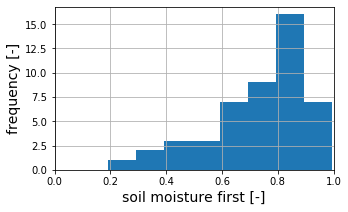

In [58]:
# Plot soil moisture histogram
fig = plt.figure(figsize=(5, 3))
axes = plt.axes()
axes.autoscale(True)

n, bins, patches = plt.hist(var_data_x, 8)

axes.set_xlim(0, 1)
plt.grid(True)

axes.set_xlabel('soil moisture first [-]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
axes.set_ylabel('frequency [-]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))

plt.show()

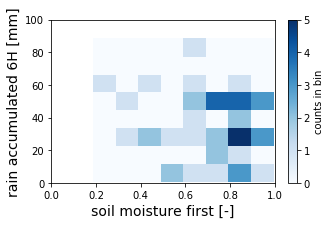

In [59]:
# Plot soil moisture vs rain histogram
fig = plt.figure(figsize=(5, 3))
axes = plt.axes()
axes.autoscale(True)

plt.hist2d(var_data_x, var_data_y, bins=8, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

axes.set_xlim(0, 1)
axes.set_ylim(0, 100)

axes.set_xlabel('soil moisture first [-]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
axes.set_ylabel('rain accumulated 6H [mm]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))

plt.show()

## Exercize 5 - Event distribution 

In [60]:
dframe_scenarios_5 = dframe_scenarios_csv.copy()

In [61]:
# Exercize settings
event_index_min = 2

time_start = None # '2018-01-01'
time_end = None # '2019-01-01'

alert_area_name = None # 'alert_area_c'

In [62]:
# Compute ancillary information
line_data_x = np.linspace(0, 1, 101)

line_data_y_thr1 = -200 * line_data_x + 100
line_data_y_thr1[line_data_y_thr1 < 0] = 0.0

line_data_y_thr2 = -90 * line_data_x + 100
line_data_y_thr2[line_data_y_thr2 < 0] = 10.0

In [63]:
# Select alert area datasets
if alert_area_name is not None:
    dframe_scenarios_5 = dframe_scenarios_5.loc[dframe_scenarios_5['event_domain'] == alert_area_name]

# Select time period datasets
if (time_start is not None) and (time_end is not None):
    time_stamp_start = pd.Timestamp(time_start)
    time_stamp_end = pd.Timestamp(time_end)
    dframe_scenarios_5 = dframe_scenarios_5[time_stamp_start.strftime(time_format_datasets):
                                            time_stamp_end.strftime(time_format_datasets)]

In [64]:
if event_index_min:
    dframe_scenarios_5 = dframe_scenarios_5[dframe_scenarios_5["event_index"] >= event_index_min]

In [65]:
# Get datasets
var_data_x = dframe_scenarios_5['sm_value_first'].values
var_data_y = dframe_scenarios_5['rain_accumulated_6H'].values

In [66]:
# Select threshold for each event
var_data_thr1 = []
var_data_thr2 = []
for var_point_x, var_point_y in zip(var_data_x, var_data_y):

    line_index_x = np.abs(line_data_x - var_point_x).argmin()

    line_point_x = line_data_x.flat[line_index_x]
    line_point_y_thr1 = line_data_y_thr1.flat[line_index_x]
    line_point_y_thr2 = line_data_y_thr2.flat[line_index_x]

    var_point_thr1 = 0
    if (np.isfinite(line_point_y_thr1)) and (var_point_y > line_point_y_thr1):
        var_point_thr1 = 1
    if (np.isfinite(line_point_y_thr1)) and (var_point_x == 1):
        if var_point_y < 10:
            var_point_thr1 = 1
        else:
            var_point_thr1 = 0

    var_point_thr2 = 0
    if (np.isfinite(line_point_y_thr2)) and (var_point_y > line_point_y_thr2):
        if var_point_y >= 10:
            var_point_thr2 = 1

    # To assign only a class
    if (var_point_thr1 == 1) and (var_point_thr2 == 1):
        var_point_thr1 = 0

    var_data_thr1.append(var_point_thr1)
    var_data_thr2.append(var_point_thr2)

dframe_scenarios_5['event_thr1'] = var_data_thr1
dframe_scenarios_5['event_thr2'] = var_data_thr2

In [67]:
# Dataframe scenarios according with the thresholds
dframe_scenarios_5_thr1 = dframe_scenarios_5[dframe_scenarios_5["event_thr1"] == 1]
dframe_scenarios_5_thr2 = dframe_scenarios_5[dframe_scenarios_5["event_thr2"] == 1]
dframe_scenarios_5_thr0 = dframe_scenarios_5[(dframe_scenarios_5["event_thr1"] == 0) & (dframe_scenarios_5["event_thr2"] == 0)]

In [68]:
# Count event for each threshold
grade_thr0 = dframe_scenarios_5_thr0['event_index'].value_counts(normalize=True) * 100
grade_thr1 = dframe_scenarios_5_thr1['event_index'].value_counts(normalize=True) * 100
grade_thr2 = dframe_scenarios_5_thr2['event_index'].value_counts(normalize=True) * 100

In [69]:
# Define dictionary related to event counting
grade_default = {0: None, 1: None, 2: None, 3: None, 4: None}

grade_thr0 = {**grade_default, **grade_thr0}
grade_thr1 = {**grade_default, **grade_thr1}
grade_thr2 = {**grade_default, **grade_thr2}

grade_dict = {'thr0': grade_thr0, 'thr1':grade_thr1, 'thr2': grade_thr2}

In [70]:
dframe_grade = pd.DataFrame(grade_dict)

In [71]:
dframe_grade.head(5)

,thr0,thr1,thr2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,100.0,67.164179,39.534884
3,NaN,31.343284,34.883721
4,NaN,1.492537,25.581395


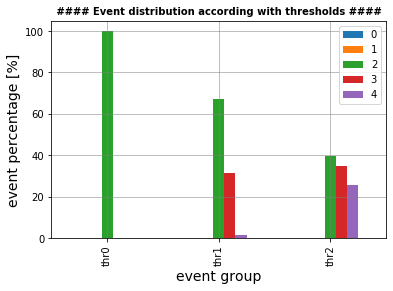

In [72]:
# Open figure
fig = dframe_grade.transpose().plot.bar()

fig.set_xlabel('event group', color='#000000', fontsize=14, fontdict=dict(weight='medium'))
fig.set_ylabel('event percentage [%]', color='#000000', fontsize=14, fontdict=dict(weight='medium'))

fig.grid(b=False, color='grey', linestyle='-', linewidth=0.5, alpha=1)

fig.set_title(' #### Event distribution according with thresholds #### ',
               fontdict=dict(fontsize=10, fontweight='bold'))

plt.show()

## Exercize 6 - Rain Map

In [ ]:
# Add library (if needed)
!conda install --yes --channel conda-forge cartopy=0.17 

In [1]:
import cartopy
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from matplotlib.colors import ListedColormap

In [2]:
center_right = file_bounds_rain.right - (file_res_rain[0] / 2)
center_left = file_bounds_rain.left + (file_res_rain[0] / 2)
center_top = file_bounds_rain.top - (file_res_rain[1] / 2)
center_bottom = file_bounds_rain.bottom + (file_res_rain[1] / 2)

lon = np.arange(center_left, center_right + np.abs(file_res_rain[0] / 2), np.abs(file_res_rain[0]), float)
lat = np.flip(np.arange(center_bottom, center_top + np.abs(file_res_rain[0] / 2), np.abs(file_res_rain[1]), float), axis=0)
lons, lats = np.meshgrid(lon, lat)

NameError: name 'file_bounds_rain' is not defined

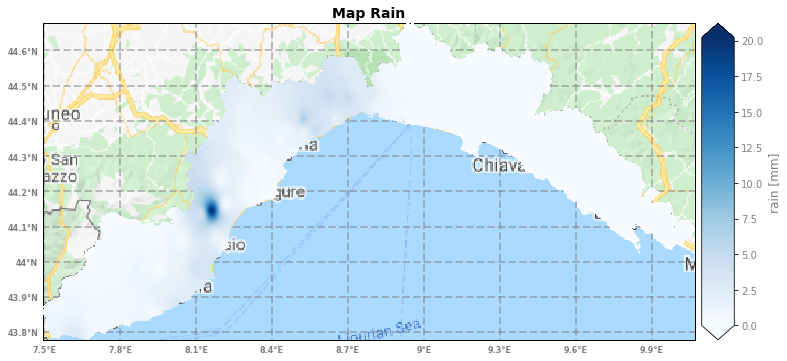

In [74]:
# Define graph title
figure_title = 'Map Rain'

plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

# Create a background map
#map_background = cimgt.Stamen('terrain-background')
# map_background = cimgt.OSM()
map_background = cimgt.GoogleTiles()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title(figure_title, size=14, color='black', weight='bold')
# ax.coastlines(resolution='10m', color='black')
ax.stock_img()
ax.set_extent([center_left, center_right, center_bottom, center_top])

gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_bottom = True
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}

# Add the Stamen data at zoom level 8.
ax.add_image(map_background, 8)

sc = ax.pcolormesh(lons, lats, file_data_rain, zorder=3, transform=data_crs, cmap='Blues')
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb, extend='both')
cb1.set_label('rain [mm]', size=12, color='gray', weight='normal')
cb1.ax.tick_params(labelsize=10, labelcolor='gray')

In [75]:
# Choose colormap
cmap = plt.cm.Blues
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
# Set alpha
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
# Create new colormap
my_cmap = ListedColormap(my_cmap)

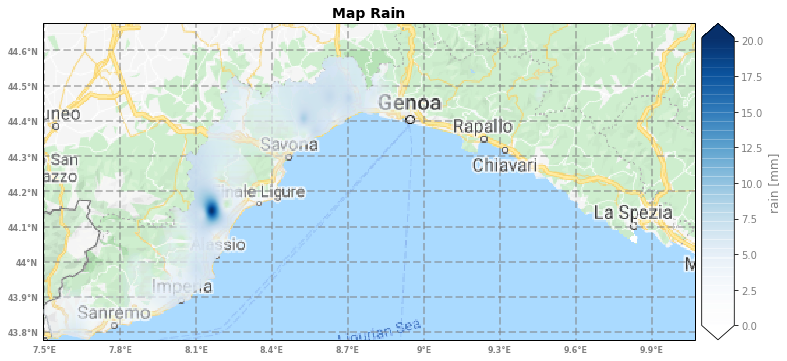

In [76]:
# Define graph title
figure_title = 'Map Rain'

plot_crs = cartopy.crs.Mercator()
data_crs = cartopy.crs.PlateCarree()

# Create a background map
#map_background = cimgt.Stamen('terrain-background')
# map_background = cimgt.OSM()
map_background = cimgt.GoogleTiles()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=plot_crs)
ax.set_title(figure_title, size=14, color='black', weight='bold')
# ax.coastlines(resolution='10m', color='black')
ax.stock_img()
ax.set_extent([center_left, center_right, center_bottom, center_top])

gl = ax.gridlines(crs=data_crs, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_bottom = True
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 8, 'color': 'gray', 'weight': 'bold'}

# Add the Stamen data at zoom level 8.
ax.add_image(map_background, 8)

sc = ax.pcolormesh(lons, lats, file_data_rain, zorder=3, transform=data_crs, cmap=my_cmap)
divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(ax_cb)
cb1 = plt.colorbar(sc, cax=ax_cb, extend='both')
cb1.set_label('rain [mm]', size=12, color='gray', weight='normal')
cb1.ax.tick_params(labelsize=10, labelcolor='gray')

## That is for this analysis of soilslips datasets¶

You might exercise a bit:

* try to plot the soil moisture map;
* try to change the reference time-series in the exercizes;
* try to select different time period and/or alert area in the exercizes;
* try to set different season and/or different event index in the exercizes;
* try to add useful information to the scenarios dataframe;
* try to modify graphs;
* try to perform new analysis based on the same scenarios datasets;
* ...